<a href="https://colab.research.google.com/github/virf96/Neural-Networks/blob/main/CNN_Example_(Convolutional_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib.pyplot import imshow
import numpy as np

In [ ]:
train, test = mnist.load_data()

In [ ]:
xt, yt = train[0], train[1]
xv, yv = test[0], test[1]

In [ ]:
xt.shape, yt.shape

((60000, 28, 28), (60000,))

In [ ]:
xv.shape, yv.shape

((10000, 28, 28), (10000,))

El MNIST dataset, contiene imagenes de los digtos del 0 al 9 escritos a mano

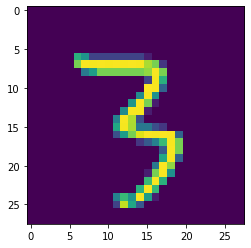

In [ ]:
imshow(xt[44])

In [ ]:
np.unique(yt) ## clases de la target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Preprocesing

In [ ]:
xt[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
xt = xt/255 ## el maximo valor para colores de 8 bits
xv = xv/255

In [ ]:
xt[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### One hot encoding

In [ ]:
yt_oneHot = np.eye(10)[yt]
yv_oneHot = np.eye(10)[yv]

In [ ]:
yt_oneHot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
yt_oneHot.shape

(60000, 10)

In [ ]:
yt_oneHot[:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
yt[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ## La convolucion 2d trata volumenes, la conv3d trata volomunes con canales
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, InputLayer
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
xt.shape

(60000, 28, 28)

In [ ]:
### convertimos las imagenes a volumen

In [ ]:
xt =xt.reshape(60000,28,28,1)
xv = xv.reshape(10000,28,28,1)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1))) ## las dimensiones de la imagen
model.add(Conv2D(filters =10 , kernel_size = (4,4), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))
model.add(Conv2D(filters = 30 , kernel_size = (10,10), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
          
model.compile(loss=CategoricalCrossentropy(), optimizer = Adam(0.001))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        170       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 30)        30030     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               188288    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
yt_oneHot.shape

(60000, 10)

In [ ]:
yv_oneHot.shape

(10000, 10)

In [ ]:
history = model.fit(xt,yt_oneHot, epochs=200, batch_size=1024, validation_data=(xv,yv_oneHot))

Epoch 1/200
59/59 [==============================] - 94s 2s/step - loss: 0.6446 - val_loss: 0.1955
Epoch 2/200
59/59 [==============================] - 93s 2s/step - loss: 0.1601 - val_loss: 0.1072
Epoch 3/200
59/59 [==============================] - 93s 2s/step - loss: 0.1004 - val_loss: 0.0741
Epoch 4/200
59/59 [==============================] - 93s 2s/step - loss: 0.0752 - val_loss: 0.0576
Epoch 5/200
59/59 [==============================] - 93s 2s/step - loss: 0.0612 - val_loss: 0.0486
Epoch 6/200
59/59 [==============================] - 93s 2s/step - loss: 0.0523 - val_loss: 0.0467
Epoch 7/200
59/59 [==============================] - 92s 2s/step - loss: 0.0454 - val_loss: 0.0402
Epoch 8/200
59/59 [==============================] - 93s 2s/step - loss: 0.0382 - val_loss: 0.0363
Epoch 9/200
59/59 [==============================] - 92s 2s/step - loss: 0.0345 - val_loss: 0.0348
Epoch 10/200
59/59 [==============================] - 93s 2s/step - loss: 0.0316 - val_loss: 0.0409
Epoch 11/

### Función de perdida

In [ ]:
from plotly import graph_objects as go

In [ ]:
fig = go.Figure(layout = dict(title="Loss"))
fig.add_trace(go.Scatter(x=list(range(len(history.history["loss"]))),y=history.history["loss"], name="loss"))
fig.add_trace(go.Scatter(x=list(range(len(history.history["loss"]))),y=history.history["val_loss"], name="val_loss"))
fig.show()

el modelo dice que es  0


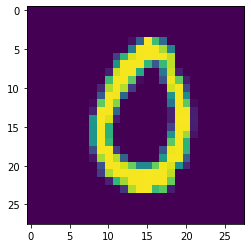

In [ ]:
index = 1001
print("el modelo dice que es ",np.squeeze(np.argmax(model.predict(xv[index:index+1,:,:,:]),axis=1)))
imshow(xv[index])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = np.argmax(model.predict(xv),axis=1)
accuracy_score(yv,y_pred)

0.9913

In [ ]:
y_pred = np.argmax(model.predict(xt),axis=1)
accuracy_score(yt,y_pred)

1.0